In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [44]:
img_width=256; img_height=256
batch_size=8

In [45]:
TRAINING_DIR = 'Kaggle_MRI_Tumor/Training'

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True
                                   )

In [46]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width)
                                                    )

Found 2870 images belonging to 4 classes.


In [6]:
train_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [38]:
train_generator.labels

array([0, 0, 0, ..., 3, 3, 3])

In [39]:
train_generator.classes

array([0, 0, 0, ..., 3, 3, 3])

In [33]:
help(ImageDataGenerator.flow_from_directory)

Help on function flow_from_directory in module keras.preprocessing.image:

flow_from_directory(self, directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False)
    Takes the path to a directory & generates batches of augmented data.
    
    Args:
        directory: string, path to the target directory. It should contain
          one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images
          inside each of the subdirectories directory tree will be included
          in the generator. See [this script](
          https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
          for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
          256)`. The dimensions to which all images found will be resized.
        colo

In [47]:
VALIDATION_DIR = 'Kaggle_MRI_Tumor/Testing'

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [48]:
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 394 images belonging to 4 classes.


In [18]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [9]:
help(ModelCheckpoint)

Help on class ModelCheckpoint in module keras.callbacks:

class ModelCheckpoint(Callback)
 |  ModelCheckpoint(filepath, monitor: str = 'val_loss', verbose: int = 0, save_best_only: bool = False, save_weights_only: bool = False, mode: str = 'auto', save_freq='epoch', options=None, initial_value_threshold=None, **kwargs)
 |  
 |  Callback to save the Keras model or model weights at some frequency.
 |  
 |  `ModelCheckpoint` callback is used in conjunction with training using
 |  `model.fit()` to save a model or weights (in a checkpoint file) at some
 |  interval, so the model or weights can be loaded later to continue the
 |  training from the state saved.
 |  
 |  A few options this callback provides include:
 |  
 |  - Whether to only keep the model that has achieved the "best performance" so
 |    far, or whether to save the model at the end of every epoch regardless of
 |    performance.
 |  - Definition of 'best'; which quantity to monitor and whether it should be
 |    maximized or

In [49]:
callbacks = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='auto')
best_model_file = '.../resnet50_drop_batch_best_weights_256.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [12]:
help(ResNet50)

Help on function ResNet50 in module keras.applications.resnet:

ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, **kwargs)
    Instantiates the ResNet50 architecture.
    
    Reference:
    - [Deep Residual Learning for Image Recognition](
        https://arxiv.org/abs/1512.03385) (CVPR 2015)
    
    For image classification use cases, see
    [this page for detailed examples](
      https://keras.io/api/applications/#usage-examples-for-image-classification-models).
    
    For transfer learning use cases, make sure to read the
    [guide to transfer learning & fine-tuning](
      https://keras.io/guides/transfer_learning/).
    
    Note: each Keras Application expects a specific kind of input preprocessing.
    For ResNet, call `tf.keras.applications.resnet.preprocess_input` on your
    inputs before passing them to the model.
    `resnet.preprocess_input` will convert the input images from RGB to BGR,
    then will ze

In [50]:
#  wp = '.../weather_pred/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
resnet50_base = ResNet50(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_height, img_width,3))

In [15]:
resnet50_base.get_layer

<bound method Model.get_layer of <keras.engine.functional.Functional object at 0x0000024214426910>>

In [55]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`, then we create
 |  a `kernel` with shape `(d1, units)`, and the `kernel` operates along axis 2
 |  of the `input`, on every

In [51]:
print('Adding new layers...')
output = resnet50_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(4, activation='softmax')(output)
print('New layers added!')

Adding new layers...
New layers added!


In [52]:
resnet50_model = Model(resnet50_base.input, output)
for layer in resnet50_model.layers[:-7]:
    layer.trainable = False

resnet50_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [21]:
help(Adam)

Help on class Adam in module keras.optimizers.optimizer_v2.adam:

class Adam(keras.optimizers.optimizer_v2.optimizer_v2.OptimizerV2)
 |  Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam', **kwargs)
 |  
 |  Optimizer that implements the Adam algorithm.
 |  
 |  Adam optimization is a stochastic gradient descent method that is based on
 |  adaptive estimation of first-order and second-order moments.
 |  
 |  According to
 |  [Kingma et al., 2014](http://arxiv.org/abs/1412.6980),
 |  the method is "*computationally
 |  efficient, has little memory requirement, invariant to diagonal rescaling of
 |  gradients, and is well suited for problems that are large in terms of
 |  data/parameters*".
 |  
 |  Args:
 |    learning_rate: A `Tensor`, floating point value, or a schedule that is a
 |      `tf.keras.optimizers.schedules.LearningRateSchedule`, or a callable
 |      that takes no arguments and returns the actual value to use, The
 |      learning

In [43]:
help(Model.compile)

Help on function compile in module keras.engine.training:

compile(self, optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None, jit_compile=None, **kwargs)
    Configures the model for training.
    
    Example:
    
    ```python
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[tf.keras.metrics.BinaryAccuracy(),
                           tf.keras.metrics.FalseNegatives()])
    ```
    
    Args:
        optimizer: String (name of optimizer) or optimizer instance. See
          `tf.keras.optimizers`.
        loss: Loss function. May be a string (name of loss function), or
          a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
          function is any callable with the signature `loss = fn(y_true,
          y_pred)`, where `y_true` are the ground truth values, and
          `y_

In [53]:
resnet50_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [25]:
help(resnet50_model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of keras.engine.functional.Functional instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Args:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return a tuple
            of either `(inp

In [54]:
history = resnet50_model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [callbacks, best_model]
                              )

Epoch 1/30
359/359 [==============================] - 771s 2s/step - loss: 1.0077 - accuracy: 0.6495 - val_loss: 2.2553 - val_accuracy: 0.5178
Epoch 2/30
359/359 [==============================] - 776s 2s/step - loss: 0.6965 - accuracy: 0.7474 - val_loss: 1.2561 - val_accuracy: 0.6294
Epoch 3/30
359/359 [==============================] - 671s 2s/step - loss: 0.5715 - accuracy: 0.7923 - val_loss: 1.0429 - val_accuracy: 0.6929
Epoch 4/30
359/359 [==============================] - 664s 2s/step - loss: 0.5373 - accuracy: 0.7955 - val_loss: 0.8617 - val_accuracy: 0.6878
Epoch 5/30
359/359 [==============================] - 639s 2s/step - loss: 0.4861 - accuracy: 0.8206 - val_loss: 1.2142 - val_accuracy: 0.6574
Epoch 6/30
359/359 [==============================] - 658s 2s/step - loss: 0.4480 - accuracy: 0.8286 - val_loss: 1.2380 - val_accuracy: 0.6574
Epoch 7/30
359/359 [==============================] - 786s 2s/step - loss: 0.4284 - accuracy: 0.8495 - val_loss: 1.0458 - val_accuracy: 0.6751

In [ ]:
target_dir = '.../weather_pred/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
resnet50_model.save(target_dir + 'resnet50_model.h5')
resnet50_model.save_weights(target_dir + 'resnet50_weights.h5')

In [58]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

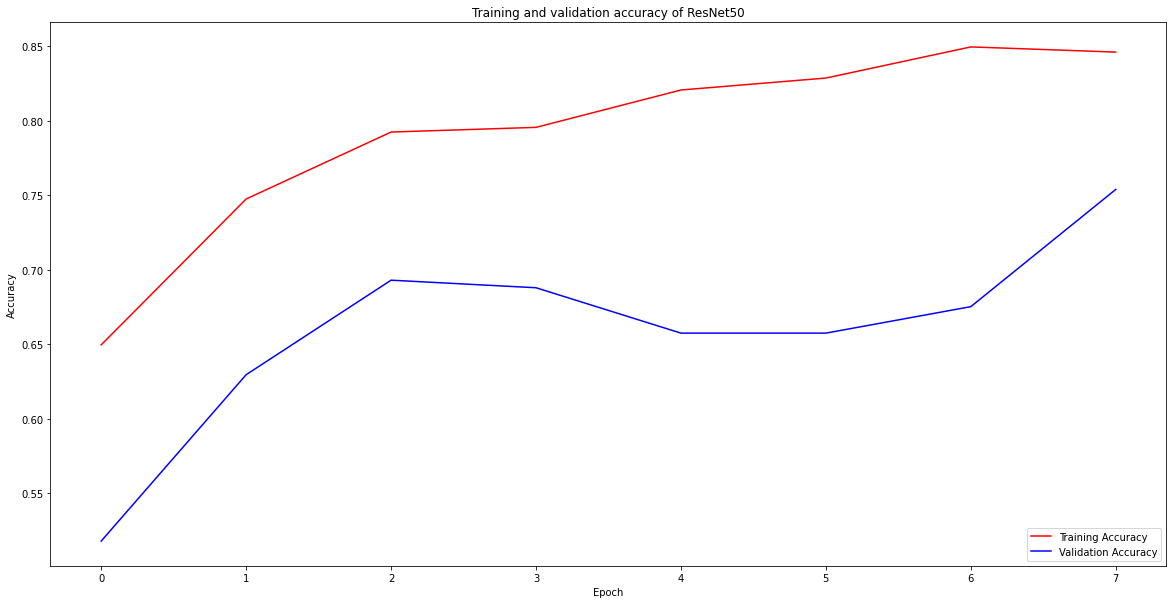

In [60]:
fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy of ResNet50')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss of ResNet50')

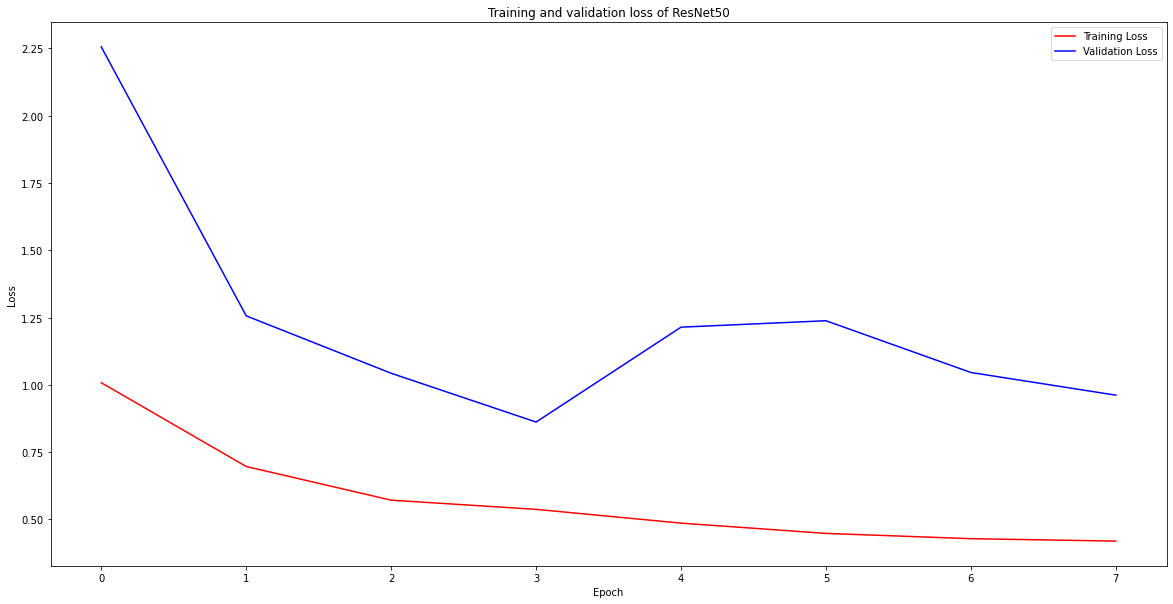

In [61]:
fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss of ResNet50')

In [65]:
history.history

{'loss': [1.0077123641967773,
  0.6964985132217407,
  0.5714860558509827,
  0.537316083908081,
  0.4861455261707306,
  0.44799643754959106,
  0.42841455340385437,
  0.41942304372787476],
 'accuracy': [0.6494773626327515,
  0.7473867535591125,
  0.7923344969749451,
  0.7954703569412231,
  0.8205574750900269,
  0.8285714387893677,
  0.8494773507118225,
  0.8459930419921875],
 'val_loss': [2.2553436756134033,
  1.2561155557632446,
  1.0429401397705078,
  0.8616520166397095,
  1.214207649230957,
  1.2380081415176392,
  1.045784831047058,
  0.9615227580070496],
 'val_accuracy': [0.5177664756774902,
  0.6294416189193726,
  0.692893385887146,
  0.6878172755241394,
  0.6573604345321655,
  0.6573604345321655,
  0.6751269102096558,
  0.7538071274757385]}